# Reviews Data Loading and Preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
plt.rcParams['figure.dpi'] = 300

In [2]:
asins_products = np.loadtxt('Data/asins_products.csv', dtype='object')

In [3]:
len(asins_products)

680980

In [4]:
reviews_df = pd.DataFrame()

with open('data/Clothing_Shoes_and_Jewelry.json', 'r') as f:
    
    reader = pd.read_json(f, orient = 'records', lines = True, chunksize = 500_000, nrows = 32_292_099)
    
    total = 32_292_099/500_000
    counter = 0
    
    for chunk in reader:
        
        chunk_dropped = chunk.drop(columns=['image', 'unixReviewTime', 'style', 'reviewerName'])\
                         .sample(frac=0.4, random_state=42)
        
        chunk_dropped = chunk_dropped.query('asin in @asins_products')
                                                                                                   
        reviews_df = pd.concat([reviews_df, chunk_dropped], axis = 0)
                
        counter += 1
        print(counter/total*100, 'and the shape is', reviews_df.shape[0], end="\r")

In [6]:
reviews_df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewText,summary
104241,3,3,True,"06 20, 2016",A3EHNOVMY77W0U,B0001N5WMW,Bought them for a vacation to Costa Rica. Not ...,Lower quality than expected
199676,1,NaN,False,"07 21, 2014",A1RVPZ44BNCOL0,B0002NYUE2,completely wrong size,men size not boys
132814,5,NaN,True,"07 8, 2013",A3NNMXQ7P1HEHP,B00020BFSE,"Smells great, works fine with my size 9 work s...","Great, though I wonder how strong the loop is"
408697,5,NaN,True,"06 6, 2017",AYJ7HFE42ZZFS,B0009B35DY,Good,Five Stars
163280,5,NaN,True,"12 25, 2012",A1U04XCUUGJMDL,B0002L0P9I,"This slipper is perfect. It is true to size, ...",Warm Feet on Bamboo


In [7]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6255781 entries, 104241 to 32075573
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   overall     int64 
 1   vote        object
 2   verified    bool  
 3   reviewTime  object
 4   reviewerID  object
 5   asin        object
 6   reviewText  object
 7   summary     object
dtypes: bool(1), int64(1), object(6)
memory usage: 387.8+ MB


In [10]:
reviews_df

,overall,vote,verified,reviewTime,reviewerID,asin,reviewText,summary
0,3,3.0,True,"06 20, 2016",A3EHNOVMY77W0U,B0001N5WMW,Bought them for a vacation to Costa Rica. Not ...,Lower quality than expected
1,1,NaN,False,"07 21, 2014",A1RVPZ44BNCOL0,B0002NYUE2,completely wrong size,men size not boys
2,5,NaN,True,"07 8, 2013",A3NNMXQ7P1HEHP,B00020BFSE,"Smells great, works fine with my size 9 work s...","Great, though I wonder how strong the loop is"
3,5,NaN,True,"06 6, 2017",AYJ7HFE42ZZFS,B0009B35DY,Good,Five Stars
4,5,NaN,True,"12 25, 2012",A1U04XCUUGJMDL,B0002L0P9I,"This slipper is perfect. It is true to size, ...",Warm Feet on Bamboo
...,...,...,...,...,...,...,...,...
6255776,5,NaN,True,"06 15, 2018",A13XFA6HDDHXQK,B01HH6WWZ0,Super cute. Fits great!,Five Stars
6255777,3,NaN,True,"03 4, 2018",AXETI2EZT77G0,B01HJCNFDU,these shoes seem like they could be so comfort...,these shoes seem like they could be so comfort...
6255778,4,NaN,True,"04 10, 2017",A13QWLE4LR3N01,B01GD5EPR4,"Very nice purse, fits a lot of cards and has a...",Lovely!
6255779,5,NaN,True,"07 18, 2018",A1CEK51A1EZDQ7,B01HHA3X04,I bought these for my girlfriend and she loves...,"Comfortable and comes as pictured, but runs la..."


#### `vote`

In [4]:
reviews_votes = reviews_df['vote']

In [5]:
reviews_votes

0          3.0
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
6255776    NaN
6255777    NaN
6255778    NaN
6255779    NaN
6255780    NaN
Name: vote, Length: 6255781, dtype: object

In [12]:
reviews_votes = reviews_votes.fillna(0)

In [14]:
reviews_votes

0          3.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
6255776    0.0
6255777    0.0
6255778    0.0
6255779    0.0
6255780    0.0
Name: vote, Length: 6255781, dtype: float64

In [15]:
reviews_votes = pd.to_numeric(reviews_votes, errors='coerce')

In [21]:
reviews_votes.isna().sum()

0

In [22]:
reviews_votes = reviews_votes.astype(int)

In [26]:
reviews_votes

0          3
1          0
2          0
3          0
4          0
          ..
6255776    0
6255777    0
6255778    0
6255779    0
6255780    0
Name: vote, Length: 6255781, dtype: int32

In [25]:
reviews_votes[reviews_votes != 0]

0          3
26         5
68         3
80         3
96         2
          ..
6255645    4
6255675    3
6255702    2
6255753    5
6255767    2
Name: vote, Length: 518128, dtype: int32

In [27]:
reviews_df['vote'] = reviews_votes

In [28]:
reviews_df

,overall,vote,verified,reviewTime,reviewerID,asin,reviewText,summary
0,3,3,True,"06 20, 2016",A3EHNOVMY77W0U,B0001N5WMW,Bought them for a vacation to Costa Rica. Not ...,Lower quality than expected
1,1,0,False,"07 21, 2014",A1RVPZ44BNCOL0,B0002NYUE2,completely wrong size,men size not boys
2,5,0,True,"07 8, 2013",A3NNMXQ7P1HEHP,B00020BFSE,"Smells great, works fine with my size 9 work s...","Great, though I wonder how strong the loop is"
3,5,0,True,"06 6, 2017",AYJ7HFE42ZZFS,B0009B35DY,Good,Five Stars
4,5,0,True,"12 25, 2012",A1U04XCUUGJMDL,B0002L0P9I,"This slipper is perfect. It is true to size, ...",Warm Feet on Bamboo
...,...,...,...,...,...,...,...,...
6255776,5,0,True,"06 15, 2018",A13XFA6HDDHXQK,B01HH6WWZ0,Super cute. Fits great!,Five Stars
6255777,3,0,True,"03 4, 2018",AXETI2EZT77G0,B01HJCNFDU,these shoes seem like they could be so comfort...,these shoes seem like they could be so comfort...
6255778,4,0,True,"04 10, 2017",A13QWLE4LR3N01,B01GD5EPR4,"Very nice purse, fits a lot of cards and has a...",Lovely!
6255779,5,0,True,"07 18, 2018",A1CEK51A1EZDQ7,B01HHA3X04,I bought these for my girlfriend and she loves...,"Comfortable and comes as pictured, but runs la..."


## `verified`

In [31]:
reviews_df['verified'].count() - reviews_df['verified'].sum()

326469

In [32]:
reviews_df['verified'].sum()

5929312

Lets drop the unverified reviews.

In [30]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255781 entries, 0 to 6255780
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   overall     int64 
 1   vote        int32 
 2   verified    bool  
 3   reviewTime  object
 4   reviewerID  object
 5   asin        object
 6   reviewText  object
 7   summary     object
dtypes: bool(1), int32(1), int64(1), object(5)
memory usage: 316.2+ MB


## `reviewTime`

In [8]:
reviews_df.to_csv('Data/reviews_sampled40.csv', index=False)

In [3]:
reviews_df = pd.read_csv('Data/reviews_sampled40.csv')

<ipython-input-3-8a311f30a0ef>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_df = pd.read_csv('Data/reviews_sampled40.csv')


In [9]:
reviews_df[reviews_df['asin'] == 'B00020BFSE']

,overall,vote,verified,reviewTime,reviewerID,asin,reviewText,summary
2,5,NaN,True,"07 8, 2013",A3NNMXQ7P1HEHP,B00020BFSE,"Smells great, works fine with my size 9 work s...","Great, though I wonder how strong the loop is"
458,5,NaN,True,"05 31, 2015",APAFRG5M0L0TU,B00020BFSE,"The trees fill the shoes very well, and hold t...",and hold the shape excellent.
515,5,NaN,True,"01 11, 2015",A1NRLAT0L31ES3,B00020BFSE,Smells incredible. Immediately after opening t...,For the love of cedar.
544,5,NaN,True,"09 3, 2015",A3OI8W0G652Y5W,B00020BFSE,Good shoe trees.,Five Stars
631,5,NaN,True,"12 27, 2013",A2K0SQBAKKFIP5,B00020BFSE,"Sturdy, works great and smells good! Not much ...",Works Great!
...,...,...,...,...,...,...,...,...
39242,5,NaN,True,"01 20, 2013",AKNWUASLZ109N,B00020BFSE,I was buying a pair of Atlanta Lace-Ups from E...,"A Simple, Uncomplicated Shoe Tree Made of Qual..."
39657,5,NaN,True,"03 25, 2015",ATWZWW292Y0AS,B00020BFSE,Great quality!,Five Stars
39876,5,NaN,True,"03 31, 2014",A1CUYE8PKZE3GL,B00020BFSE,Bought these to fit a new pair of nice leather...,"Well made, easy to use, great value."
39885,4,NaN,True,"08 10, 2015",A2CHABJI60DXOS,B00020BFSE,Good value for cedar shoe tree,Four Stars


In [10]:
reviews_df.isna().sum() / reviews_df.isna().count() * 100

overall        0.000000
vote          91.573372
verified       0.000000
reviewTime     0.000000
reviewerID     0.000000
asin           0.000000
reviewText     0.132773
summary        0.049452
dtype: float64

In [11]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925088 entries, 0 to 1925087
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   overall     int64 
 1   vote        object
 2   verified    bool  
 3   reviewTime  object
 4   reviewerID  object
 5   asin        object
 6   reviewText  object
 7   summary     object
dtypes: bool(1), int64(1), object(6)
memory usage: 104.6+ MB


## Data Visualizations

#### `overall`

In [17]:
reviews_df['overall'].unique()

array([3, 1, 5, 4, 2], dtype=int64)

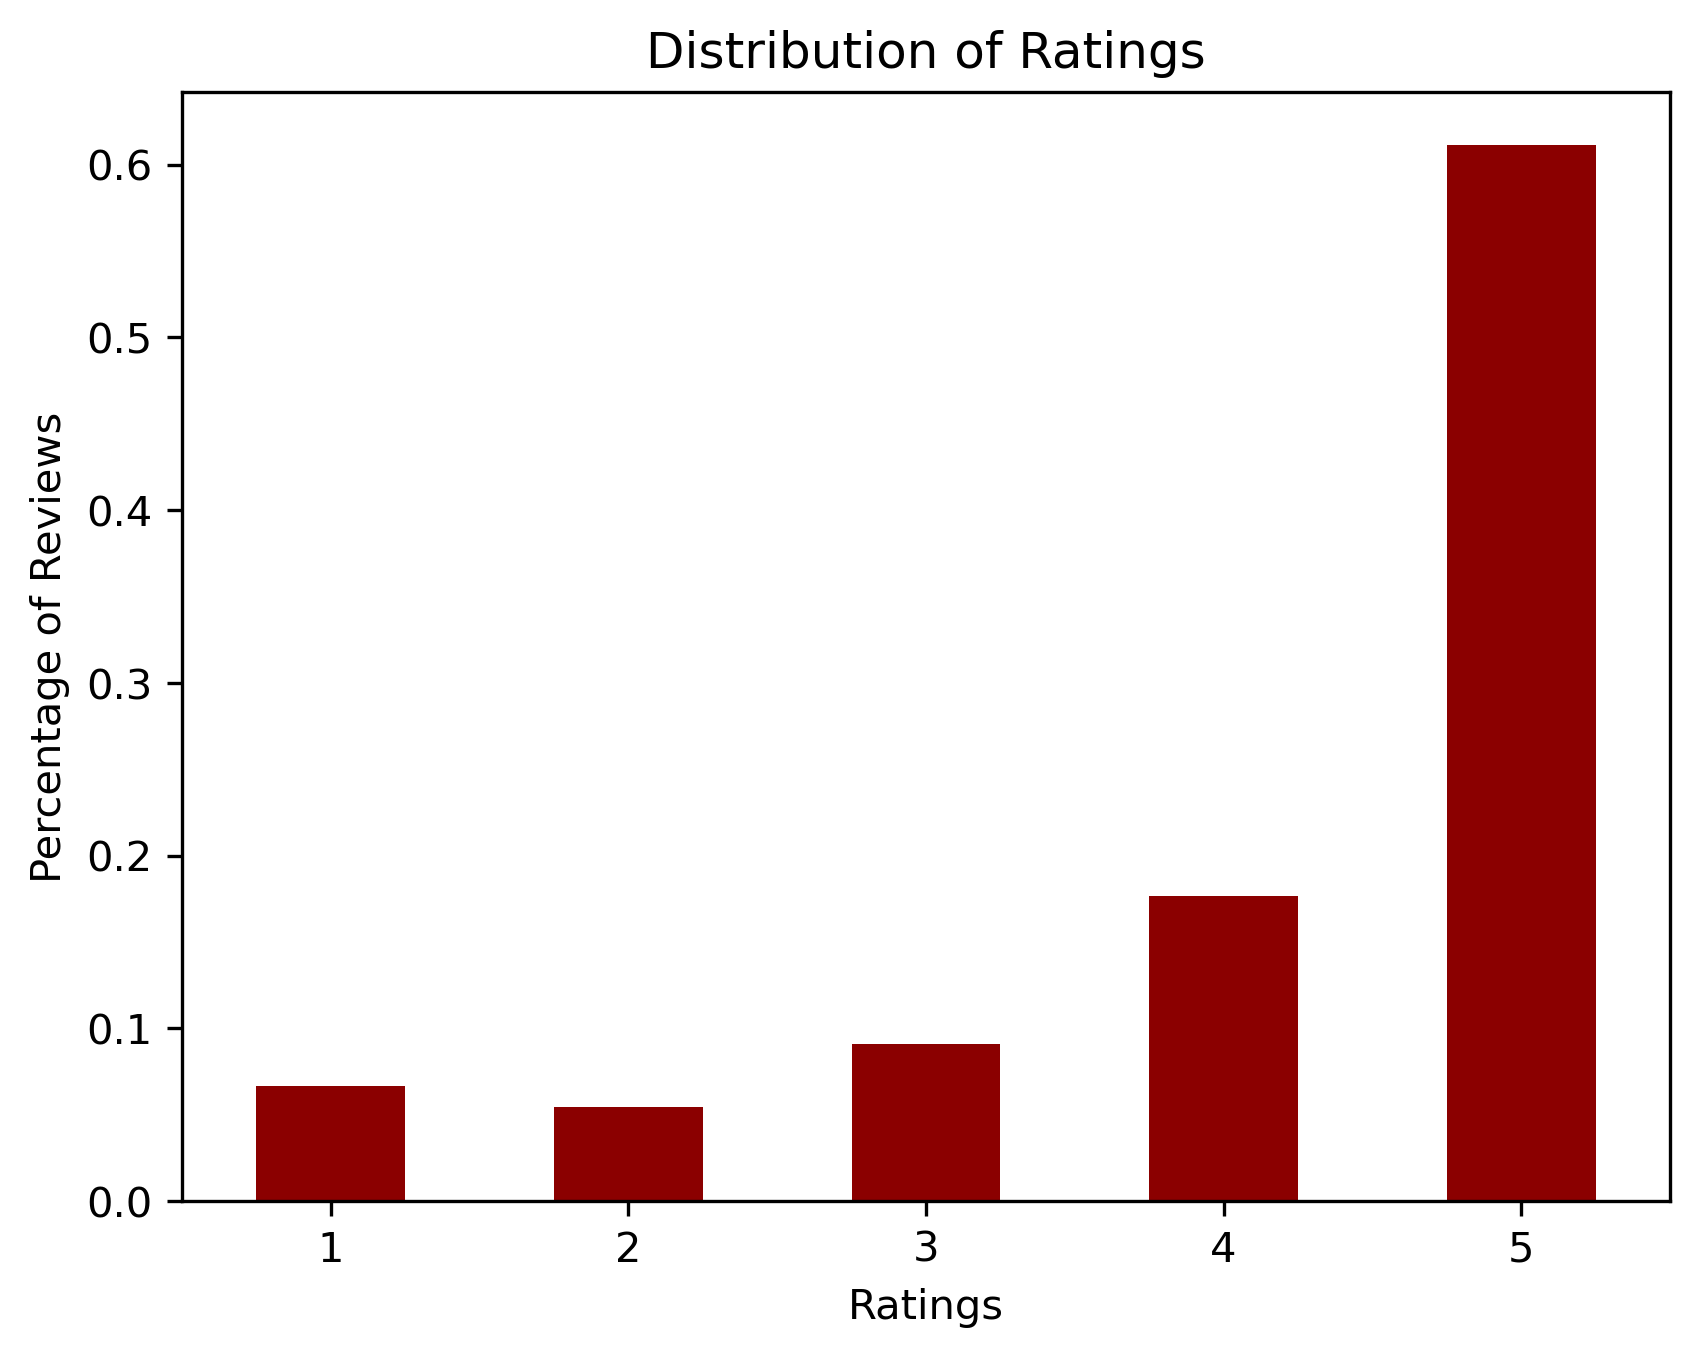

In [28]:
reviews_df['overall'].value_counts(normalize=True).sort_index().plot(kind='bar', rot=0, title='Distribution of Ratings', \
                                                                     color = 'darkred')
plt.xlabel('Ratings')
plt.ylabel('Percentage of Reviews')
plt.show()

### Basic Numbers 

In [86]:
unique_asin = reviews_df['asin'].nunique()
unique_reviewers = reviews_df['reviewerID'].nunique()

print(f'There are {reviews_df.shape[0]} reviews')

print(f'There are {unique_asin} products being reviewed')

print(f'There are {unique_reviewers} unique reviewers')

There are 1925088 reviews
There are 313645 products being reviewed
There are 1613845 unique reviewers


In [35]:
no_reviews_per_reviewer = reviews_df.groupby(by='reviewerID')['overall'].count().sort_values(ascending=False)

In [31]:
no_reviews_per_reviewer

reviewerID
ALFRMOGTO1K4M     47
AVU1ILDDYW301     39
A2503LT8PZIHAD    31
A3W5A9X3HHACQT    30
A2RYWPOL4NN2KG    30
                  ..
A2CMIKZT0XTU5I     1
A2CMIFAQDEAI9S     1
A2CMIDSTMH02FR     1
A2CMIBQ95AVP3T     1
AZZZZJYGA32        1
Name: overall, Length: 1613845, dtype: int64

In [36]:
no_reviews_per_reviewer.describe()

count    4.124367e+06
mean     1.516786e+00
std      1.319759e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.120000e+02
Name: overall, dtype: float64

Majority of reviewers leave one review.

In [37]:
quantiles = no_reviews_per_reviewer.quantile(np.arange(0,1.01,0.01))

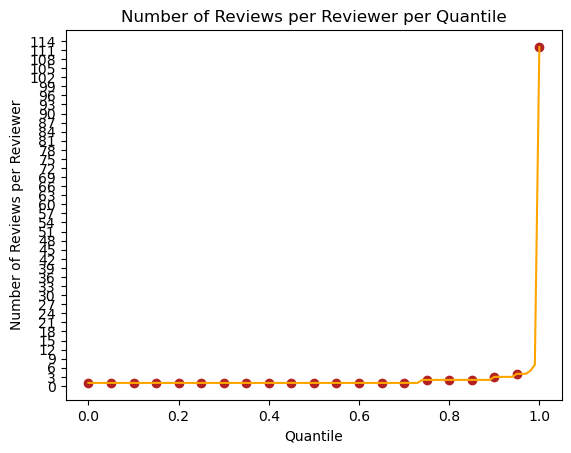

In [38]:
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='firebrick')
plt.plot(quantiles, 'orange')

plt.title('Number of Reviews per Reviewer per Quantile')
plt.xlabel('Quantile')
plt.ylabel('Number of Reviews per Reviewer')

plt.yticks(np.arange(0, max(quantiles)+3, 3))

plt.show()